In [1]:
%pylab

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


0.25434720444927955


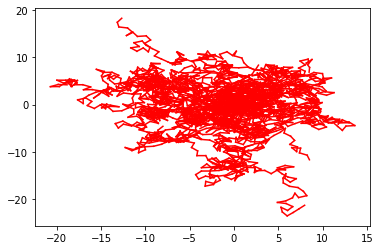

In [15]:
#5.4.2
def paso2D(x,y):
    dxp = (random.random()-0.5)*2
    dyp = (random.random()-0.5)*2
    L = np.sqrt(dxp**2 + dyp**2)
    dx = dxp/L
    dy = dyp/L
    x += dx
    y += dy
    return x, y

def caminar2D(N,f):
    x=0
    y=0
    xi=np.array([])
    xf=np.array([])
    for i in range(N):
        x0, y0 = copy.copy(x), copy.copy(y)
        xi = np.append(xi,x0)
        x, y = paso2D(x,y)
        xf = np.append(xf,x)
        plt.plot([x0,x],[y0,y],'r')
    return N, xf, xi
    
def caminos2D(N,f):
    a = np.array([])
    k = 31 #int(np.sqrt(N))
    for i in range(k):
        b,c,d = caminar2D(N,f)
        a = np.append(a,R2(b,c,d))
    return k, a

def R2(N,xf,xi=0):
    a = (xf-xi)**2
    return (1/N)*sum(a)

k,r = caminos2D(100,paso2D) #Ya que si el numero de caminos es 31, deben ser 31**2 pasos. 

plt.savefig('caminos.png')


print(R2(k,r))

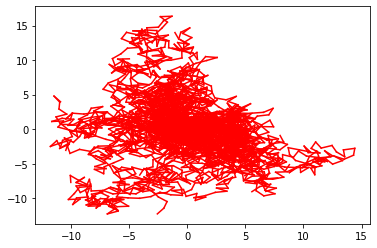

In [10]:
a=np.array([10,100])
p1,q1 = np.array([]),np.array([])
for i in a:
    p,q = caminos2D(i,paso2D)
plt.plot(p1,R2(p1,q1))
plt.savefig('r2.png')

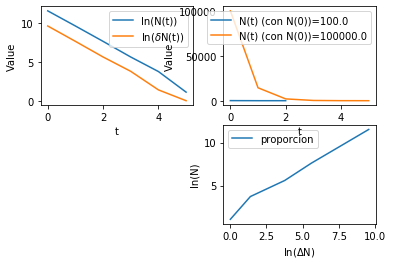

In [4]:
#5.6
def N(n,lam):
    t=0
    tl=np.array([])
    nl=np.array([])
    dnl=np.array([])
    while (n>0):
        deltaN = 0
        for i in range(1,n+1):
            if (random.random()<lam):
                deltaN += 1
        tl=np.append(tl,t)
        nl=np.append(nl,n)
        dnl=np.append(dnl,(n-deltaN)+1)
        t+=1
        n-=deltaN
    return tl, dnl, nl
 
lam=random.random()
a,b,c=N(100000,lam)
d,e,f=N(100,lam)

#Punto 1 Ln(N) y Ln(deltaN) con respecto al tiempo
m = subplot(2,2,1)
m.plot(a,np.log(c),label='ln(N(t))')
m.plot(a,np.log(b),label='ln($\delta$N(t))')
m.set_xlabel('t')
m.set_ylabel('Value')
m.legend()
plt.savefig('decaeen.png')

#Punto 4 son proporcionales
g = subplot(2,2,4)
g.plot(np.log(b), np.log(c),label='proporcion')
g.set_xlabel('ln($\Delta$N)')
g.set_ylabel('ln(N)')
g.legend()

#Punto 3. Independencia del N(0)
n = subplot(2,2,2)
n.plot(d,f,label='N(t) (con N(0))={}'.format(f[0]))
n.plot(a,c,label='N(t) (con N(0))={}'.format(c[0]))
n.set_xlabel('t')
n.set_ylabel('Value')
n.legend()

plt.show()

#Punto 5. 
#Cuando un evento es espontaneo y aleatorio, implica que va a tener cambios sin importar la influencia del ambiente, 
#en la naturaleza, las diferentes acciones tienden al estado de equilibrio, por ejemplo en el caso en el que disminuye
#la radioactividad hasta el punto en el que tiende a 0. Este proceso puede ser muy largo o muy corto dependiendo de la 
#la probabilidad de que haya un resultado. A medida que más variables son aleatorias, más aleatorio es el resultado y 
#por lo pronto también es más complicado saber su probabilidad. 

#Punto 6.
#Es exponencial porque a medida de que el tiempo crece, la forma en la que disminuye n depende de 
#deltaN que aumenta de a 1*x, con x aleatorios menores que n, donde n es cada vez es más pequeño por 
#lo que ya no se agrgan tantos 1s, pero la proporción hace que la caida sea mayor, por lo que disminuye 
#exponencialmente, no potencialemnte, ya que no disminuye siempre en factor de un número, sino en aumento, 
#decae cada vez más.
